# 確率積分

確率過程で時刻に沿って確率変数を積分したいときがあります。

例えば時刻$t=[a, b]$間でギャンブルをするとします。ギャンブルで得られる利益がブラウン運動に従うときに、時刻$t=[a, b]$で得られる利益の確率変数は次の伊藤積分で計算することができます。

確率積分はリーマン積分と似た感じで導入されます。まず、次の``単過程``を考えます。

$$
f_t(\omega) = \sum^n_{j=1} e_j(\omega) {\bf 1}_{[t_{j-1}, t_j]}(t)
$$

ここで、$e_j$は$\mathcal{F}_{t_{j-1}}$可測です。
これはつまり、$[a, b]$間で同じ値を取る$n$個の時刻で構築される過程です。
この単過程に対して、伊藤積分は次のように定義されます

$$
\int^b_a f_t dB_t := \sum^n_{j=1} e_j(\omega) (B_{t_j}(\omega) - B_{t_{j-1}}(\omega))
$$

適当な確率過程 $f_t$を積分したい場合、次のような``単過程``で近似してから積分すれば良さそうです。

$$
f_t^{(m)}(\omega) = \sum^m_{j=1} f_{t_{j-1}}(\omega) {\bf 1}_{[t_{j-1}, t_j]}(t)
$$

逆に、適当な$f$は$f^{(m)} \to \infty f$とできるので、$\int^b_a f_t dB_t := \lim_{m\to \infty} \int^b_a f_t^{(m)}dB_t$ と定めます。
これはちゃんとWell-definedになっています（証明は任せます）。

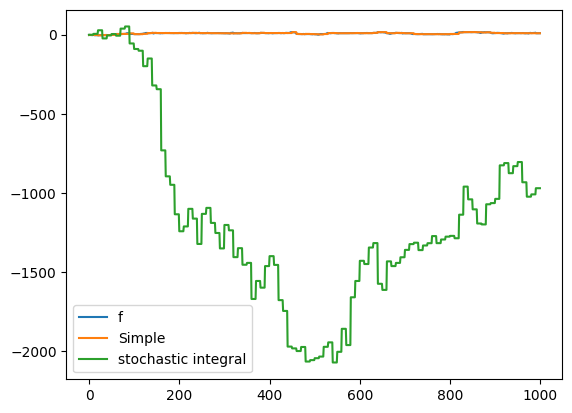

In [54]:
import numpy as np
import matplotlib.pyplot as plt


# 適当な確率過程 f
f = np.zeros(1000)
val = 0
for i in range(1000):
    val = val + np.exp(np.cos(val)) * np.random.randn()
    f[i] = val
plt.plot(f, label="f")

# 単過程
dt = 10
simple_process = np.zeros(1000)

for i in range(int(1000 / dt)):
    begin = i * dt
    end = (i + 1) * dt
    simple_process[begin:end] = f[begin]

plt.plot(simple_process, label="Simple")

# 確率積分
integral = np.zeros(1000)
val = 0
for i in range(int(1000 / dt)):
    begin = i * dt
    end = (i + 1) * dt
    val = val + f[begin] * np.random.randn() * (dt)
    integral[begin:end] = val

plt.plot(integral, label="stochastic integral")
plt.legend()